# Heart Disease prediction


In [94]:
#import all libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv(r"C:\Users\swaji\Downloads\Heart-Disease\heart.csv")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


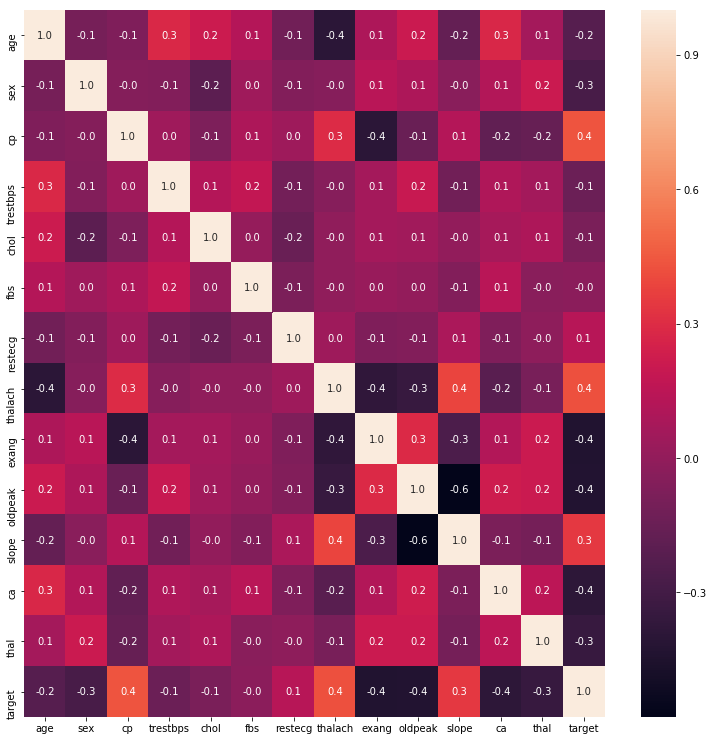

In [66]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,fmt='.1f')


In [45]:
#start analsys
age_val=df.age.value_counts()

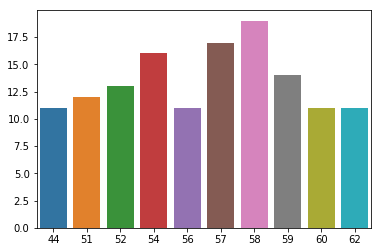

In [68]:
sns.barplot(x = age_val[:10].index,y =age_val[:10].values )


In [71]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [82]:
#cal percentage of heat disease
countNOdisease = len(df[df.target ==1])
countHavedisease = len(df[df.target ==0])
print("percentage of patients who dont have a heat disease:{:.2f}".format((countNOdisease/(len(df.target)))*100))
print("percentage of patients who  have a heat disease:{:.2f}".format((countHavedisease/(len(df.target)))*100))


percentage of patients who dont have a heat disease:54.46
percentage of patients who  have a heat disease:45.54


In [87]:
#About male and female percentage 
countfemale = len(df[df.sex==0])
countmale = len(df[df.sex==1])
print("perceneage of female patients:{:.2f}".format((countfemale/len(df.sex))*100))
print("perceneage of male patients:{:.2f}".format((countmale/len(df.sex))*100))

perceneage of female patients:31.68
perceneage of male patients:68.32


In [88]:
#About age catagory 
young_ages = df[(df.age>=19)&(df.age<=40)]
middle_ages = df[(df.age>=40)&(df.age<=55)]
old_ages = df[(df.age>=55)]
print("young ages", len(young_ages))
print("Middle ages", len(middle_ages))
print("old ages", len(old_ages))

young ages 19
Middle ages 136
old ages 159


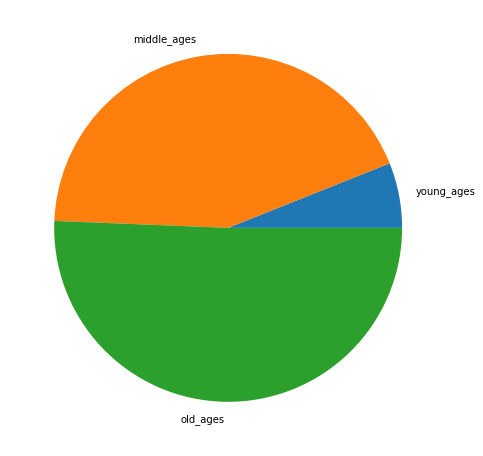

In [102]:
#plot a pie chart for better understanding
colors = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize = (8,8))
plt.pie([len(young_ages),len(middle_ages),len(old_ages)], labels=["young_ages","middle_ages","old_ages"])
plt.show()

In [106]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [107]:
df.target.unique()

array([1, 0], dtype=int64)

In [108]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [109]:
df. age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [110]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [117]:
#model building
from sklearn.linear_model import LogisticRegression
X_data = df.drop(['target'], axis =1)
y = df.target.values

In [130]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y, test_size=0.2, random_state=0)

In [ ]:
#fitting into the model

In [131]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Test Accuracy {:.2f}%'.format(lr.score(X_test, y_test)*100))

Test Accuracy 85.25%


In [132]:
#by using lgoistiscregression model we get the accuracy 85.25%


In [135]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("Test Accuracy {:.2f}%".format(knn.score(X_train,y_train)*100))

Test Accuracy 78.10%


In [136]:
#knn test acccuracy is 78.10%


In [146]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state = 2)
rf.fit(X_train,y_train)
print('Test Accuracy {:.2f}%'.format(rf.score(X_train,y_train)*100))

Test Accuracy 100.00%


In [ ]:
#Test Accurcy of Random Forest is 100%